In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

# Train Data

In [2]:
train = pd.read_csv("train.csv")

In [3]:
train.shape

(6368, 15)

In [4]:
train.head()

,Product_id,Stall_no,instock_date,Market_Category,Customer_name,Loyalty_customer,Product_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price,Selling_Price
0,BRAE2NF6JA5GUEXG,37.0,2015-08-22 18:36:12.000,2,Lillyann,Yes,Fashion,1,68,0.0,376.0,11.0,2983.0,4713.0,4185.947700
1,TUNE8SFB6RJN2HSD,38.0,2016-03-27 21:19:13.000,24,Klynn,Yes,Fashion,0,51,0.0,397.0,12.0,7495.0,10352.0,9271.490256
2,BRAEAR7WZPQGPBZU,9.0,2015-08-18 19:25:22.000,447,Ridge,Yes,Child_care,0,10,0.0,250.0,9.0,5752.0,7309.0,6785.701362
3,WATDZ2ZQ8JPDHCTJ,50.0,2016-03-28 21:53:01.000,23,Abran,Yes,Educational,2,48,0.0,144.0,13.0,5090.0,20814.0,13028.917824
4,JWSEBUKYQPMBZ3RK,7.0,2016-03-29 22:58:53.000,63,Dustyn,Yes,Repair,1,35,1.0,211.0,4.0,2430.0,9261.0,906.553935


In [5]:
train.isnull().sum()

Product_id            0
Stall_no              5
instock_date          0
Market_Category       0
Customer_name       211
Loyalty_customer      0
Product_Category      0
Grade                 0
Demand                0
Discount_avail       38
charges_1           198
charges_2 (%)       205
Minimum_price        38
Maximum_price       343
Selling_Price        41
dtype: int64

In [6]:
train.drop(columns=['Stall_no', 'Customer_name','Loyalty_customer','instock_date', 'Market_Category'], axis = 1, inplace = True)

In [7]:
train['Discount_avail'].fillna(train['Discount_avail'].mode()[0], inplace = True)

In [8]:
agg_functions = {
    'Selling_Price': ['count', 'mean'],
    'Minimum_price': ['count', 'median'],  
    'Maximum_price': ['count','median']
}

category_stats_train = train.groupby('Product_Category').agg(agg_functions)
category_stats_train.columns = ['Count_Selling_Price', 'Mean_Selling_Price', 'Count_Minimum_price', 'Median_Minimum_Price',
                          'Count_Maximum_price', 'Median_Maximum_Price']

category_stats_train

,Count_Selling_Price,Mean_Selling_Price,Count_Minimum_price,Median_Minimum_Price,Count_Maximum_price,Median_Maximum_Price
Product_Category,,,,,,
Child_care,655,4588.076258,656,3164.0,616,5745.5
Cosmetics,644,4508.838086,647,3223.0,617,5752.0
Educational,605,4292.141616,605,3073.0,575,5407.0
Fashion,604,4865.215485,602,3207.5,568,5780.5
Home_decor,611,4552.359110,613,3162.0,590,5502.0
Hospitality,628,4474.721781,630,3105.0,597,5605.0
Organic,618,4337.370474,612,3038.5,598,5509.0
Pet_care,679,4572.577753,678,3161.0,653,5731.0
Repair,666,4607.959947,671,3244.0,636,5799.5


# Missing values Imputation

In [9]:
# Fill missing values in the original DataFrame using the statistics from 'category_stats'
train_df = train.merge(category_stats_train, on='Product_Category', how='left')

# Fill missing values in respective columns
train_df['Selling_Price'].fillna(train_df['Mean_Selling_Price'], inplace=True)
train_df['Minimum_price'].fillna(train_df['Median_Minimum_Price'], inplace=True)
train_df['Maximum_price'].fillna(train_df['Median_Maximum_Price'], inplace=True)
train_df['charges_1'].fillna(method = 'bfill', inplace = True)
train_df['charges_2 (%)'].fillna(method = 'ffill', inplace = True)

# Drop the additional columns from 'category_stats'
train_df.drop(['Count_Selling_Price', 'Mean_Selling_Price', 'Count_Minimum_price', 'Median_Minimum_Price',
                          'Count_Maximum_price', 'Median_Maximum_Price'], axis=1, inplace=True)

# Display the updated DataFrame with filled missing values
train_df

,Product_id,Product_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price,Selling_Price
0,BRAE2NF6JA5GUEXG,Fashion,1,68,0.0,376.0,11.0,2983.0,4713.0,4185.947700
1,TUNE8SFB6RJN2HSD,Fashion,0,51,0.0,397.0,12.0,7495.0,10352.0,9271.490256
2,BRAEAR7WZPQGPBZU,Child_care,0,10,0.0,250.0,9.0,5752.0,7309.0,6785.701362
3,WATDZ2ZQ8JPDHCTJ,Educational,2,48,0.0,144.0,13.0,5090.0,20814.0,13028.917824
4,JWSEBUKYQPMBZ3RK,Repair,1,35,1.0,211.0,4.0,2430.0,9261.0,906.553935
...,...,...,...,...,...,...,...,...,...,...
6363,WATE7VE2D62VEKW8,Technology,0,47,0.0,614.0,10.0,8174.0,11266.0,10277.520192
6364,SHOEF9G8Z4ZXF6WE,Child_care,0,35,0.0,269.0,5.0,3564.0,4920.0,4501.837200
6365,PBXEB9ZQ7HHCFXYG,Repair,3,29,0.0,283.0,3.0,5303.0,14614.0,10218.878775
6366,NKCEAGXHRYTNTMG7,Repair,0,8,0.0,267.0,3.0,4334.0,5849.0,5359.493997


In [10]:
train_df.isnull().sum()

Product_id          0
Product_Category    0
Grade               0
Demand              0
Discount_avail      0
charges_1           0
charges_2 (%)       0
Minimum_price       0
Maximum_price       0
Selling_Price       0
dtype: int64

In [11]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [12]:
train_df['Product_Category'] = label_encoder.fit_transform(train_df['Product_Category'])

In [13]:
train_df

,Product_id,Product_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price,Selling_Price
0,BRAE2NF6JA5GUEXG,3,1,68,0.0,376.0,11.0,2983.0,4713.0,4185.947700
1,TUNE8SFB6RJN2HSD,3,0,51,0.0,397.0,12.0,7495.0,10352.0,9271.490256
2,BRAEAR7WZPQGPBZU,0,0,10,0.0,250.0,9.0,5752.0,7309.0,6785.701362
3,WATDZ2ZQ8JPDHCTJ,2,2,48,0.0,144.0,13.0,5090.0,20814.0,13028.917824
4,JWSEBUKYQPMBZ3RK,8,1,35,1.0,211.0,4.0,2430.0,9261.0,906.553935
...,...,...,...,...,...,...,...,...,...,...
6363,WATE7VE2D62VEKW8,9,0,47,0.0,614.0,10.0,8174.0,11266.0,10277.520192
6364,SHOEF9G8Z4ZXF6WE,0,0,35,0.0,269.0,5.0,3564.0,4920.0,4501.837200
6365,PBXEB9ZQ7HHCFXYG,8,3,29,0.0,283.0,3.0,5303.0,14614.0,10218.878775
6366,NKCEAGXHRYTNTMG7,8,0,8,0.0,267.0,3.0,4334.0,5849.0,5359.493997


# EDA

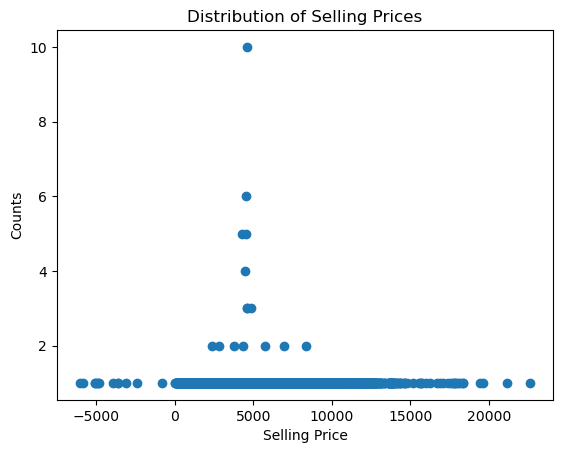

In [14]:
selling_price_val = train_df['Selling_Price'].value_counts().reset_index()
selling_price_val.columns = ['Selling_Price', 'Counts']
plt.scatter(selling_price_val['Selling_Price'], selling_price_val['Counts'])
plt.xlabel('Selling Price')
plt.ylabel('Counts')
plt.title('Distribution of Selling Prices')
plt.show()

<Axes: xlabel='Product_Category', ylabel='Selling_Price'>

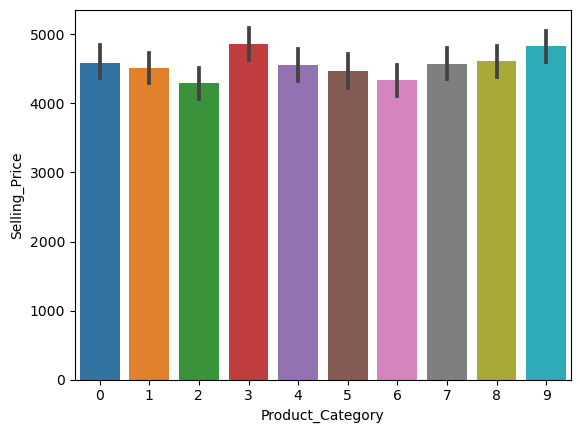

In [15]:
sns.barplot(data = train_df, x= 'Product_Category', y = 'Selling_Price')

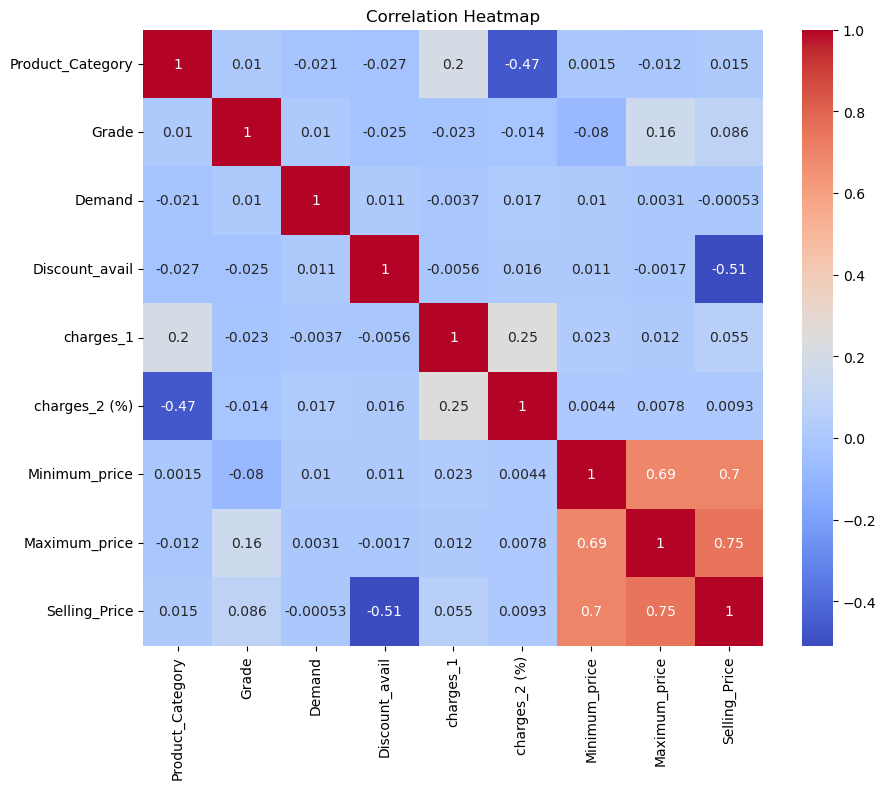

In [16]:
columns = ['Product_Category', 'Grade', 'Demand', 'Discount_avail',
           'charges_1', 'charges_2 (%)', 'Minimum_price', 'Maximum_price',
           'Selling_Price']

# Create a correlation matrix for the selected columns
correlation_matrix = train_df[columns].corr()

# Create a heatmap using the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

**charges_1' has a relatively strong positive correlation (approximately 0.202167) with 'Product_Category,' indicating that as 'charges_1' increases, 'Product_Category' tends to increase as well.**

**Discount_avail' has a moderate negative correlation (approximately -0.508417) with 'Selling_Price,' suggesting that as the discount availability decreases, the selling price tends to increase.**

**Maximum_price' and 'Selling_Price' have a relatively strong positive correlation (approximately 0.747140), indicating that as the maximum price of a product increases, its selling price tends to increase as well.**

**charges_2 (%)' and 'Product_Category' have a strong negative correlation (approximately -0.466080), suggesting an inverse relationship between them.**

**Demand' and 'Discount_avail' have a weak positive correlation (approximately 0.011185), indicating a limited relationship between them.**

In [17]:
train_df.corr()

,Product_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price,Selling_Price
Product_Category,1.000000,0.010363,-0.021062,-0.027475,0.202167,-0.466080,0.001471,-0.011563,0.015144
Grade,0.010363,1.000000,0.010107,-0.025302,-0.022972,-0.013970,-0.079594,0.161001,0.086165
Demand,-0.021062,0.010107,1.000000,0.011185,-0.003705,0.017035,0.010331,0.003059,-0.000525
Discount_avail,-0.027475,-0.025302,0.011185,1.000000,-0.005592,0.015533,0.010628,-0.001676,-0.508417
charges_1,0.202167,-0.022972,-0.003705,-0.005592,1.000000,0.254931,0.022628,0.012065,0.054728
charges_2 (%),-0.466080,-0.013970,0.017035,0.015533,0.254931,1.000000,0.004351,0.007813,0.009326
Minimum_price,0.001471,-0.079594,0.010331,0.010628,0.022628,0.004351,1.000000,0.689308,0.695834
Maximum_price,-0.011563,0.161001,0.003059,-0.001676,0.012065,0.007813,0.689308,1.000000,0.747140
Selling_Price,0.015144,0.086165,-0.000525,-0.508417,0.054728,0.009326,0.695834,0.747140,1.000000


Shapiro-Wilk Test - Statistic: 0.9542449116706848, p-value: 1.0530477699708135e-40


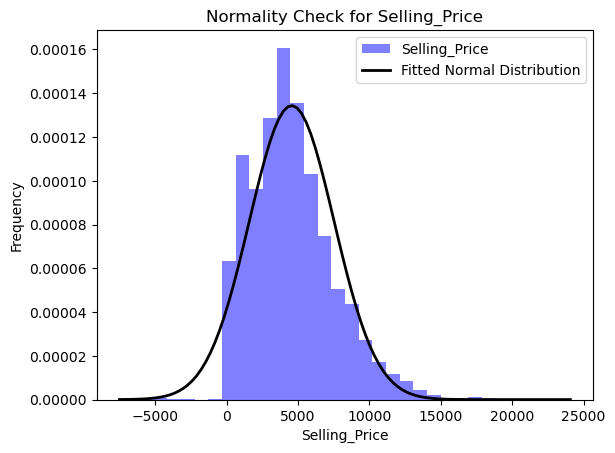

The 'Selling_Price' column does not appear to be normally distributed (p <= 0.05)


In [18]:
from scipy import stats
data = train_df['Selling_Price']

# Plot a histogram to visualize the data
plt.hist(data, bins=30, density=True, alpha=0.5, color='b', label='Selling_Price')

# Fit a normal distribution to the data and plot the PDF
mu, sigma = stats.norm.fit(data)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mu, sigma)
plt.plot(x, p, 'k', linewidth=2, label='Fitted Normal Distribution')

# Add labels and a legend
plt.xlabel('Selling_Price')
plt.ylabel('Frequency')
plt.title('Normality Check for Selling_Price')
plt.legend()

# Perform a normality test (e.g., Shapiro-Wilk test)
shapiro_test_statistic, shapiro_p_value = stats.shapiro(data)
print(f"Shapiro-Wilk Test - Statistic: {shapiro_test_statistic}, p-value: {shapiro_p_value}")

# Display the plot
plt.show()

# Interpret the results
if shapiro_p_value > 0.05:
    print("The 'Selling_Price' column appears to be normally distributed (p > 0.05)")
else:
    print("The 'Selling_Price' column does not appear to be normally distributed (p <= 0.05)")

# Normalization : a good choice as data is not normally Distributed

In [19]:
from sklearn.preprocessing import MinMaxScaler

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Specify the columns you want to normalize (replace with your actual column names)
columns_to_normalize = ['Product_Category', 'Grade', 'Demand', 'Discount_avail','charges_1', 'charges_2 (%)',
                        'Minimum_price', 'Maximum_price','Selling_Price']

# Apply the scaler to the selected columns
train_df[columns_to_normalize] = scaler.fit_transform(train_df[columns_to_normalize])

# Display the first few rows of the normalized DataFrame
print(train_df.head())

         Product_id  Product_Category     Grade    Demand  Discount_avail  \
0  BRAE2NF6JA5GUEXG          0.333333  0.333333  0.676768             0.0   
1  TUNE8SFB6RJN2HSD          0.333333  0.000000  0.505051             0.0   
2  BRAEAR7WZPQGPBZU          0.000000  0.000000  0.090909             0.0   
3  WATDZ2ZQ8JPDHCTJ          0.222222  0.666667  0.474747             0.0   
4  JWSEBUKYQPMBZ3RK          0.888889  0.333333  0.343434             1.0   

   charges_1  charges_2 (%)  Minimum_price  Maximum_price  Selling_Price  
0   0.502732         0.6250       0.169634       0.073774       0.357078  
1   0.540984         0.6875       0.426304       0.170319       0.534270  
2   0.273224         0.5000       0.327152       0.118220       0.447659  
3   0.080146         0.7500       0.289493       0.349438       0.665187  
4   0.202186         0.1875       0.138176       0.151640       0.242816  


# Splitting the Model

In [20]:
X = train_df.drop(['Selling_Price','Product_id'], axis =1)
y = train_df['Selling_Price']

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression on Train Data

Coefficients: [ 6.14813180e-04  8.04186454e-03 -2.37728653e-04 -1.51577981e-01
  1.78146802e-02  2.31534912e-03  3.08119494e-01  8.06704054e-01]
Intercept: 0.23825754103272964
Mean Squared Error (MSE): 0.0010112352600152366
R-squared (R2): 0.9026643072193773


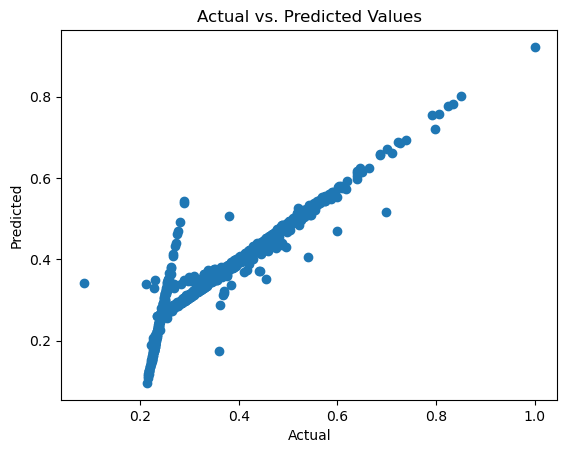

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Create a Linear Regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the model's coefficients and performance metrics
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)

# Plot actual vs. predicted values
plt.scatter(y_test, y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs. Predicted Values")
plt.show()

# Visualization of Linear Regression of Train data

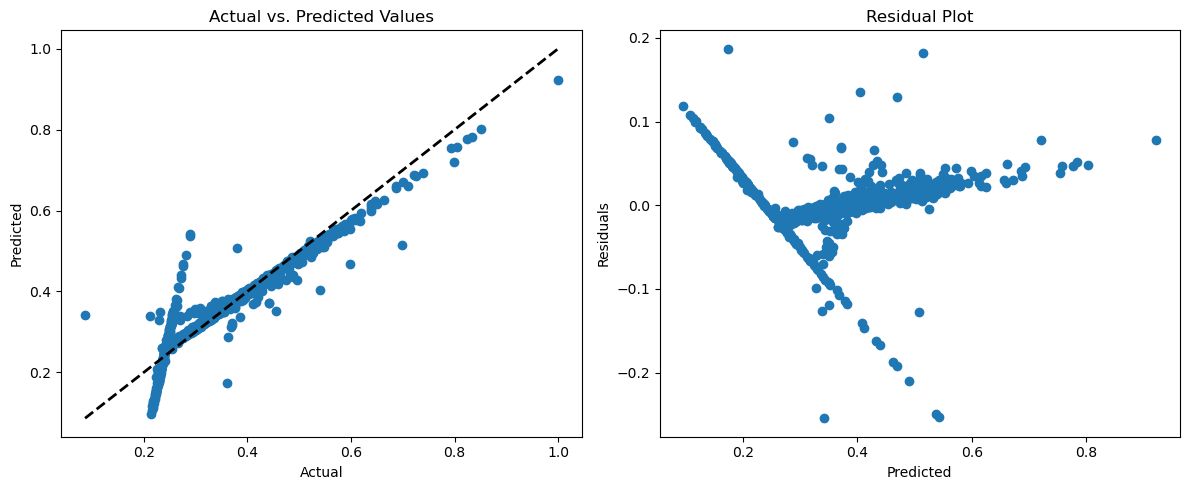

In [23]:
# Create subplots for actual vs. predicted values
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Plot actual vs. predicted values on the first subplot
ax1.scatter(y_test, y_pred)
ax1.set_xlabel("Actual")
ax1.set_ylabel("Predicted")
ax1.set_title("Actual vs. Predicted Values")

# Plot a diagonal line for reference
ax1.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)

# Create a residual plot on the second subplot
residuals = y_test - y_pred
ax2.scatter(y_pred, residuals)
ax2.set_xlabel("Predicted")
ax2.set_ylabel("Residuals")
ax2.set_title("Residual Plot")
plt.tight_layout()
plt.show()

# Feature Selection for Train Data

In [24]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(5094, 8)
(1274, 8)
(5094,)
(1274,)


In [25]:
from sklearn.feature_selection import SelectKBest, f_regression
# Initialize the SelectKBest with the f_regression scoring function
k_best_train = SelectKBest(score_func=f_regression, k=4)

# Fit the feature selector on the training data
X_train_new = k_best_train.fit_transform(X_train, y_train)

# Get the indices of the selected features for training data
selected_feature_indices_train = k_best_train.get_support(indices=True)

# Get the names of the selected features for training data
selected_features_train = X_train.columns[selected_feature_indices_train]

# Print the selected feature names for training data
print("Selected Features for Training Data:")
print(selected_features_train)

# Transform the test data using the same feature selector
X_test_new = k_best_train.transform(X_test)

Selected Features for Training Data:
Index(['Grade', 'Discount_avail', 'Minimum_price', 'Maximum_price'], dtype='object')


In [26]:
model = LinearRegression()
model.fit(X_train_new, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test_new)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the model's coefficients and performance metrics
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)

Coefficients: [ 0.0077238  -0.15157852  0.3089827   0.80618972]
Intercept: 0.24503593435655485
Mean Squared Error (MSE): 0.0010167970400577224
R-squared (R2): 0.9021289622458242


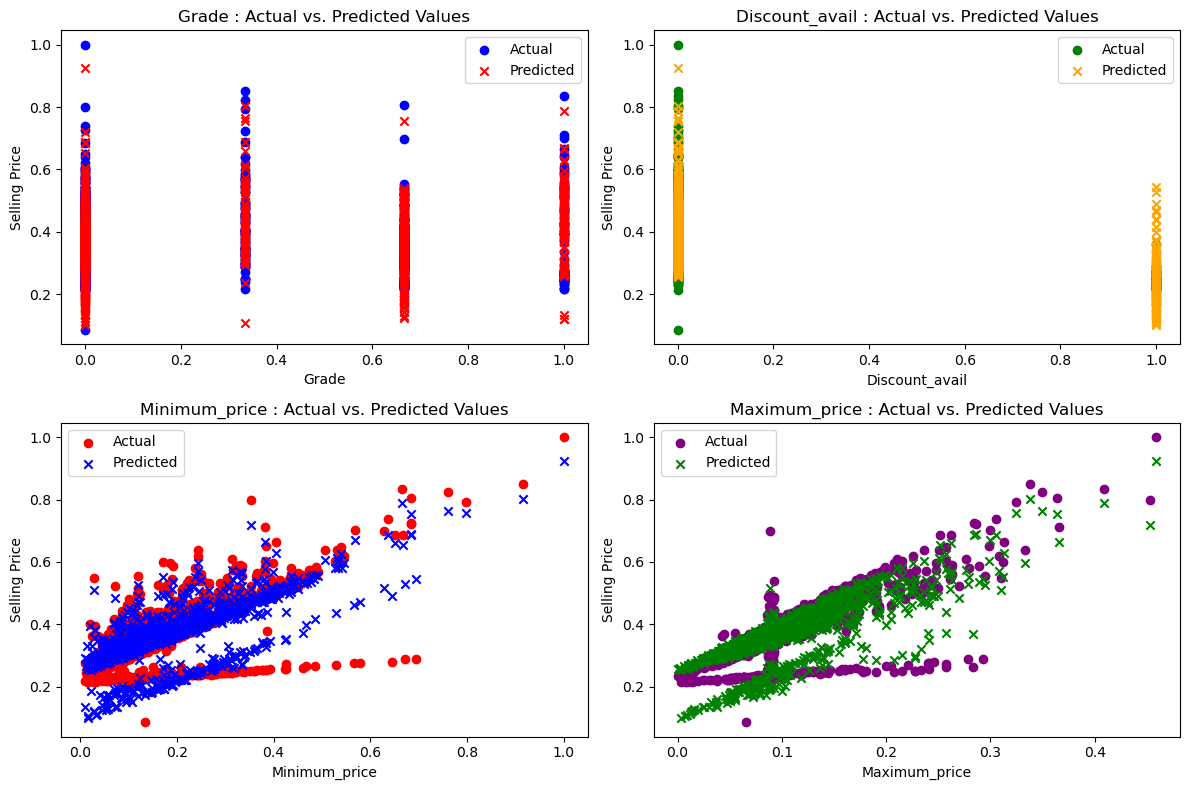

In [27]:
# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

# Scatter Plot of Grade vs. Actual vs. Predicted Values
axes[0, 0].scatter(X_test_new[:, 0], y_test, color='blue', label='Actual')
axes[0, 0].scatter(X_test_new[:, 0], y_pred, color='red', marker='x', label='Predicted')
axes[0, 0].set_xlabel('Grade')
axes[0, 0].set_ylabel('Selling Price')
axes[0, 0].set_title('Grade : Actual vs. Predicted Values')
axes[0, 0].legend()

# Scatter Plot of Discount_avail vs. Actual vs. Predicted Values
axes[0, 1].scatter(X_test_new[:, 1], y_test, color='green', label='Actual')
axes[0, 1].scatter(X_test_new[:, 1], y_pred, color='orange', marker='x', label='Predicted')
axes[0, 1].set_xlabel('Discount_avail')
axes[0, 1].set_ylabel('Selling Price')
axes[0, 1].set_title('Discount_avail : Actual vs. Predicted Values')
axes[0, 1].legend()

# Scatter Plot of Minimum_price vs. Actual vs. Predicted Values
axes[1, 0].scatter(X_test_new[:, 2], y_test, color='red', label='Actual')
axes[1, 0].scatter(X_test_new[:, 2], y_pred, color='blue', marker='x', label='Predicted')
axes[1, 0].set_xlabel('Minimum_price')
axes[1, 0].set_ylabel('Selling Price')
axes[1, 0].set_title('Minimum_price : Actual vs. Predicted Values')
axes[1, 0].legend()

# Scatter Plot of Maximum_price vs. Actual vs. Predicted Values
axes[1, 1].scatter(X_test_new[:, 3], y_test, color='purple', label='Actual')
axes[1, 1].scatter(X_test_new[:, 3], y_pred, color='green', marker='x', label='Predicted')
axes[1, 1].set_xlabel('Maximum_price')
axes[1, 1].set_ylabel('Selling Price')
axes[1, 1].set_title('Maximum_price : Actual vs. Predicted Values')
axes[1, 1].legend()

# Adjust subplot layout
plt.tight_layout()

# Display the plots
plt.show()

# Random Forest Train Data

In [28]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor()
rf_model.fit(X_train_new, y_train)

# Make predictions on the test data
y_pred = rf_model.predict(X_test_new)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the model's coefficients and performance metrics
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)

Mean Squared Error (MSE): 0.0003364453769541701
R-squared (R2): 0.9676157021579939


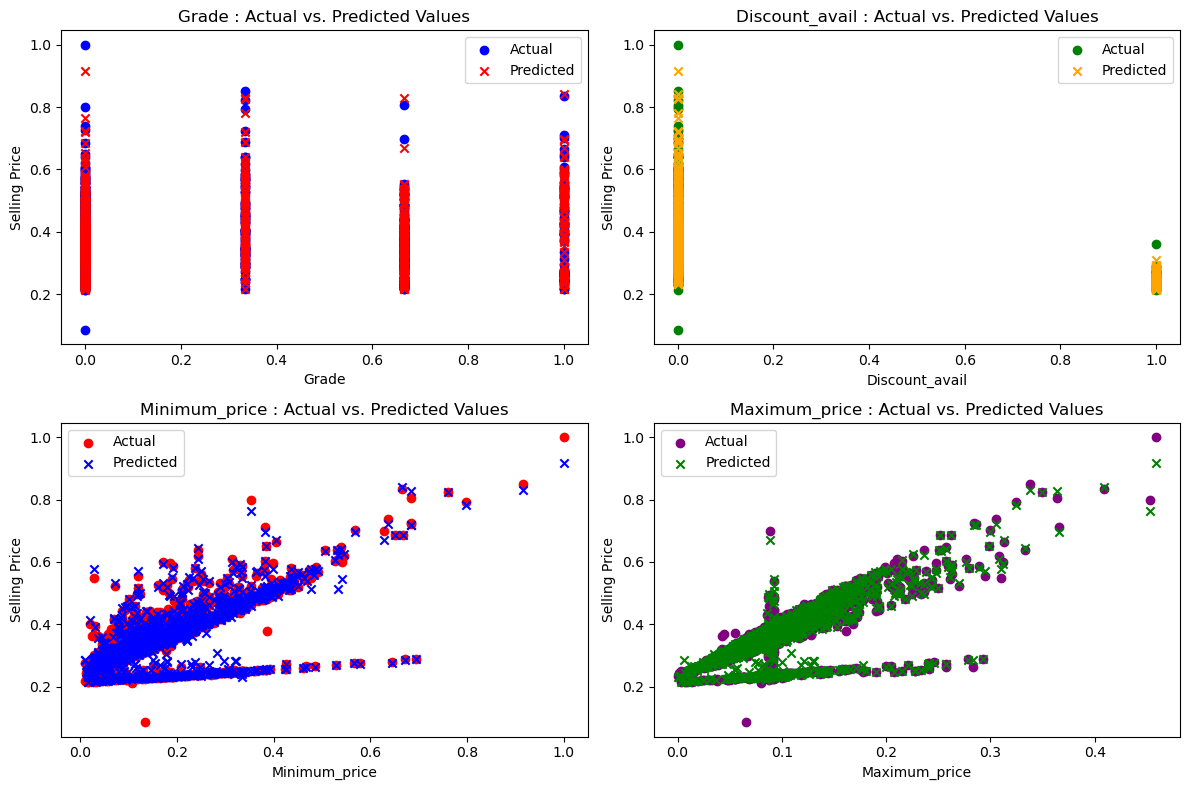

In [29]:
# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

# Scatter Plot of Grade vs. Actual vs. Predicted Values
axes[0, 0].scatter(X_test_new[:, 0], y_test, color='blue', label='Actual')
axes[0, 0].scatter(X_test_new[:, 0], y_pred, color='red', marker='x', label='Predicted')
axes[0, 0].set_xlabel('Grade')
axes[0, 0].set_ylabel('Selling Price')
axes[0, 0].set_title('Grade : Actual vs. Predicted Values')
axes[0, 0].legend()

# Scatter Plot of Discount_avail vs. Actual vs. Predicted Values
axes[0, 1].scatter(X_test_new[:, 1], y_test, color='green', label='Actual')
axes[0, 1].scatter(X_test_new[:, 1], y_pred, color='orange', marker='x', label='Predicted')
axes[0, 1].set_xlabel('Discount_avail')
axes[0, 1].set_ylabel('Selling Price')
axes[0, 1].set_title('Discount_avail : Actual vs. Predicted Values')
axes[0, 1].legend()

# Scatter Plot of Minimum_price vs. Actual vs. Predicted Values
axes[1, 0].scatter(X_test_new[:, 2], y_test, color='red', label='Actual')
axes[1, 0].scatter(X_test_new[:, 2], y_pred, color='blue', marker='x', label='Predicted')
axes[1, 0].set_xlabel('Minimum_price')
axes[1, 0].set_ylabel('Selling Price')
axes[1, 0].set_title('Minimum_price : Actual vs. Predicted Values')
axes[1, 0].legend()

# Scatter Plot of Maximum_price vs. Actual vs. Predicted Values
axes[1, 1].scatter(X_test_new[:, 3], y_test, color='purple', label='Actual')
axes[1, 1].scatter(X_test_new[:, 3], y_pred, color='green', marker='x', label='Predicted')
axes[1, 1].set_xlabel('Maximum_price')
axes[1, 1].set_ylabel('Selling Price')
axes[1, 1].set_title('Maximum_price : Actual vs. Predicted Values')
axes[1, 1].legend()

# Adjust subplot layout
plt.tight_layout()

# Display the plots
plt.show()

# Test Data

In [30]:
test = pd.read_csv("test1.csv")

In [31]:
test.shape

(3430, 14)

In [32]:
test.head()

,Product_id,Stall_no,instock_date,Market_Category,Customer_name,Loyalty_customer,Product_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price
0,SCHE4YSTDVPVZVXW,39.0,45:08.0,205,Ivanka,No,Fashion,0,90,0,380.0,16.0,2576.0,3340
1,ACCEGCATKHNRXUHW,49.0,37:05.0,3,Isaak,Yes,Fashion,0,87,0,393.0,16.0,1202.0,1955
2,NKCE6GJ5XVJDXNNZ,1.0,12:39.0,183,Analiese,No,Technology,2,55,0,493.0,9.0,7175.0,15715
3,NKCEB8BK3ZXDHDHM,8.0,56:19.0,358,Rusty,Yes,Child_care,3,86,0,303.0,16.0,5404.0,13078
4,TOPEFDXSAHRNPF94,33.0,09:46.0,167,Eloise,No,Technology,0,27,0,567.0,16.0,4069.0,6244


In [33]:
test.isnull().sum()

Product_id           0
Stall_no             1
instock_date         0
Market_Category      0
Customer_name       53
Loyalty_customer     0
Product_Category     0
Grade                0
Demand               0
Discount_avail       0
charges_1           36
charges_2 (%)        5
Minimum_price       14
Maximum_price        0
dtype: int64

In [34]:
test.drop(columns=['Stall_no', 'Customer_name','Loyalty_customer','instock_date', 'Market_Category'], axis = 1, inplace = True)

In [35]:
test['Discount_avail'].fillna(test['Discount_avail'].mode()[0], inplace = True)

In [36]:
agg_functions = {
    'Minimum_price': ['count', 'median'],  
    'Maximum_price': ['count','median']
}

category_stats_test = test.groupby('Product_Category').agg(agg_functions)
category_stats_test.columns = ['Count_Minimum_price', 'Median_Minimum_Price','Count_Maximum_price', 'Median_Maximum_Price']

category_stats_test

,Count_Minimum_price,Median_Minimum_Price,Count_Maximum_price,Median_Maximum_Price
Product_Category,,,,
Child_care,347,3324.0,348,5294.5
Cosmetics,347,3140.0,348,5678.0
Educational,354,2898.0,355,5170.0
Fashion,344,3053.5,345,5353.0
Home_decor,337,3189.0,340,5395.0
Hospitality,327,2899.0,327,5401.0
Organic,334,2856.5,336,5340.0
Pet_care,345,3094.0,346,5365.0
Repair,342,3042.5,345,5401.0


# Missing values Imputation

In [37]:
# Fill missing values in the original DataFrame using the statistics from 'category_stats'
test_df = test.merge(category_stats_test, on='Product_Category', how='left')

# Fill missing values in respective columns
test_df['Minimum_price'].fillna(test_df['Median_Minimum_Price'], inplace=True)
test_df['Maximum_price'].fillna(test_df['Median_Maximum_Price'], inplace=True)
test_df['charges_1'].fillna(method = 'bfill', inplace = True)
test_df['charges_2 (%)'].fillna(method = 'ffill', inplace = True)

# Drop the additional columns from 'category_stats'
test_df.drop(['Count_Minimum_price', 'Median_Minimum_Price','Count_Maximum_price', 'Median_Maximum_Price'],
             axis=1, inplace=True)

# Display the updated DataFrame with filled missing values
test_df

,Product_id,Product_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price
0,SCHE4YSTDVPVZVXW,Fashion,0,90,0,380.0,16.0,2576.0,3340
1,ACCEGCATKHNRXUHW,Fashion,0,87,0,393.0,16.0,1202.0,1955
2,NKCE6GJ5XVJDXNNZ,Technology,2,55,0,493.0,9.0,7175.0,15715
3,NKCEB8BK3ZXDHDHM,Child_care,3,86,0,303.0,16.0,5404.0,13078
4,TOPEFDXSAHRNPF94,Technology,0,27,0,567.0,16.0,4069.0,6244
...,...,...,...,...,...,...,...,...,...
3425,BBAE9K7BXFUTDNBK,Pet_care,0,39,0,117.0,5.0,3094.0,4674
3426,RTRDYPA4PJHCJCGF,Technology,3,17,0,509.0,6.0,3384.0,14105
3427,TUNE8FWQBS7TVVT7,Educational,0,36,0,150.0,17.0,710.0,10894
3428,NKCEGMUABCRGUZPE,Child_care,0,63,0,325.0,15.0,1477.0,5165


In [38]:
test_df.isnull().sum()

Product_id          0
Product_Category    0
Grade               0
Demand              0
Discount_avail      0
charges_1           0
charges_2 (%)       0
Minimum_price       0
Maximum_price       0
dtype: int64

In [39]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [40]:
test_df['Product_Category'] = label_encoder.fit_transform(test_df['Product_Category'])

# Normalization for testing Data

In [41]:
from sklearn.preprocessing import MinMaxScaler

# Create a MinMaxScaler object
scaler_test = MinMaxScaler()

# Specify the columns you want to normalize (replace with your actual column names)
columns_to_normalize = ['Product_Category', 'Grade', 'Demand', 'Discount_avail','charges_1', 'charges_2 (%)',
                        'Minimum_price', 'Maximum_price']

# Apply the scaler to the selected columns
test_df[columns_to_normalize] = scaler_test.fit_transform(test_df[columns_to_normalize])

# Display the first few rows of the normalized DataFrame
print(test_df.head())

         Product_id  Product_Category     Grade    Demand  Discount_avail  \
0  SCHE4YSTDVPVZVXW          0.333333  0.000000  0.898990             0.0   
1  ACCEGCATKHNRXUHW          0.333333  0.000000  0.868687             0.0   
2  NKCE6GJ5XVJDXNNZ          1.000000  0.666667  0.545455             0.0   
3  NKCEB8BK3ZXDHDHM          0.000000  1.000000  0.858586             0.0   
4  TOPEFDXSAHRNPF94          1.000000  0.000000  0.262626             0.0   

   charges_1  charges_2 (%)  Minimum_price  Maximum_price  
0   0.510949         0.9375       0.143745       0.114318  
1   0.534672         0.9375       0.063196       0.064481  
2   0.717153         0.5000       0.413354       0.559606  
3   0.370438         0.9375       0.309532       0.464719  
4   0.852190         0.9375       0.231270       0.218812  


In [42]:
test_df.shape

(3430, 9)

In [43]:
X_test_testing = test_df[['Grade', 'Discount_avail', 'Minimum_price', 'Maximum_price']]

In [44]:
X_test_testing.shape

(3430, 4)

In [45]:
y_pred_testing = model.predict(X_test_testing)

In [46]:
results_df = pd.DataFrame({'Product_id': test_df['Product_id'], 'Selling_Price_Prediction': y_pred_testing})

In [47]:
results_df

,Product_id,Selling_Price_Prediction
0,SCHE4YSTDVPVZVXW,0.381612
1,ACCEGCATKHNRXUHW,0.316547
2,NKCE6GJ5XVJDXNNZ,0.829053
3,NKCEB8BK3ZXDHDHM,0.723051
4,TOPEFDXSAHRNPF94,0.492898
...,...,...
3425,BBAE9K7BXFUTDNBK,0.429693
3426,RTRDYPA4PJHCJCGF,0.716254
3427,TUNE8FWQBS7TVVT7,0.566946
3428,NKCEGMUABCRGUZPE,0.414647


In [48]:
results_df.to_csv('predictions.csv', index=False)

In [49]:
top_five_results = results_df.head(5)
top_five_results.to_csv('top_five_predictions.csv', index=False)